## Librerías:

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import rasterio
import zipfile

Para los datos Landsat 8 utilizamos las siguientes fórmulas de MNDWI y NDVI:  

*NDWI = (Verde – SWIR)/(Verde + SWIR)*   
**NDWI = (Banda 3 – Banda 6)/(Banda 3 + Banda 6)**  
Los valores del NDWI corresponden a los siguientes rangos:  
0,2 – 1 – Superficie del agua,  
0,0 – 0,2 – Inundación, humedad,  
-0,3 – 0,0 – Sequía moderada, superficies sin agua,  
-1 – -0,3 – Sequía, superficies sin agua  

*NDVI = (Rojo – NIR)/(Rojo + NIR)*  
**NDVI = (Banda 5 - Banda 4)/(Banda 5 + Banda 4)**  


## Carga de imagenes

In [43]:
imagenes = zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip', 'r')
imgfile = imagenes.read('2023-05-14.SR_B3.tif')
with zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip') as myzip:
    myzip.extractall('Los-Molinos_2023-05-14_6_all_bands/')

In [27]:
# Cargamos la imagen y la dividimos por 255 para normalizarla 
path = 'Los-Molinos_2023-05-14_6_all_bands/'
B3= mpimg.imread(path + '2023-05-14.SR_B3.tif') / 255
B4= mpimg.imread(path + '2023-05-14.SR_B4.tif') / 255
B5= mpimg.imread(path + '2023-05-14.SR_B5.tif') / 255
B6= mpimg.imread(path + '2023-05-14.SR_B6.tif') / 255


IndexError: band index 3 out of range (not in (1,))

### Exploración de las imágenes

In [ ]:
# Obtenemos las dimensiones
print("Dimensiones de imagen B3:")
[filas, columnas] = B3.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B4:")
[filas, columnas] = B4.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B5:")
[filas, columnas] = B5.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B6:")
[filas, columnas] = B6.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

# Mostramos qué tipo de objeto son las bandas
print('\nTipo de objeto: ', type(B3), type(B4), type(B5), type(B6))



Ver imagenes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


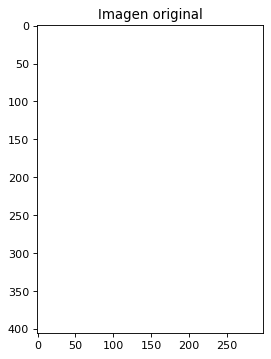

In [40]:
# unimos las bandas
Bandas = np.zeros([filas, columnas, 4])
Bandas[:, :, 0] = B3
Bandas[:, :, 1] = B4
Bandas[:, :, 2] = B5
Bandas[:, :, 3] = B6

# Creamos una figura y definimos su tamaño, los puntos por pulgada, el color del fondo y de bordes
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')

# Creamos el título de la figura
plt.title('Imagen original')

# Cargamos los datos de la imagen a la figura, definiendo los valores máximos y mínimos
plt.imshow(Bandas, vmin=0)

# Mostramos la figura
plt.show()